#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [20]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('./Salaries.csv', sep=',', index_col='Id')
df.head()


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Data expolration

In [22]:
rows, columns = df.shape
print(f"the data set have {rows} rows and {columns} columns")

the data set have 148654 rows and 12 columns


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            0 non-null       float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.7+ MB


In [24]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Descriptive Statistics

In [25]:
df.drop(['Year', 'Notes', 'Status'], axis=1).describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


looks like some payments are negative further analysis is needed to check what a negative pay means

In [26]:
def_neg_basepay = df[df['BasePay'] < 0]

In [27]:
def_neg_basepay.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,NaN,San Francisco,NaN


In [28]:
def_neg_basepay['JobTitle'].value_counts()

JobTitle
Junior Clerk    10
Clerk            1
Name: count, dtype: int64

looks like clerks have negative income it could be human error while entering data.
methods to deal with this:
    1- turning them to positive values. This doesnt seem right as their values are low compared to others
    2- deleting the records which seems reasonable judging by the small size number of records 
    3- replacing them with NAN then fill them with median pay

In [29]:
def_neg_totalpay = df[df['TotalPay'] < 0]
def_neg_totalpay.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


<Axes: >

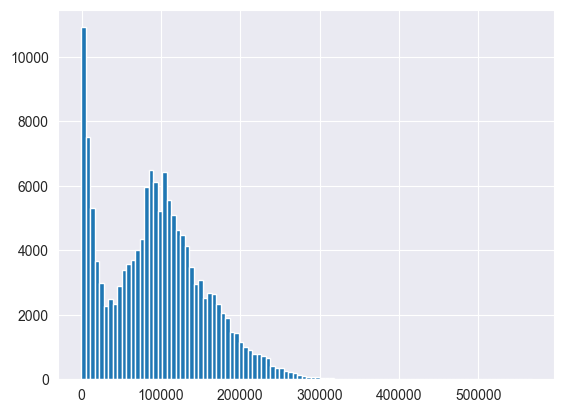

In [30]:
df['TotalPayBenefits'].hist(bins=100)

In [31]:
print(f"The total pay with benefites range from {df['TotalPayBenefits'].min()} to {df['TotalPayBenefits'].max()}")
print('Trimming and outliers remedies are needed')

The total pay with benefites range from -618.13 to 567595.43
Trimming and outliers remedies are needed


# Data cleaning 

In [32]:
# notes and status column are empty, droping them is a viable option.
df.drop(['Status', 'Notes'], axis=1, inplace=True)
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [33]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [34]:
#benefits columns has lots of missing data how ever its treated as zero when you take a look at TotalPayBenefits, filling nans with zero seems right
df['Benefits'].fillna(0, inplace=True)

In [35]:
df.isnull().sum()/len(df)

EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.004097
OvertimePay         0.000027
OtherPay            0.000027
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64

In [36]:
#since other columns have very little missing values, removing the records should be fine as they are less than 1% of total records

In [37]:
df.dropna(axis=0, inplace=True)

In [38]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [39]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y").dt.year

In [40]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
Id,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


### data visualization

<Axes: xlabel='BasePay', ylabel='Count'>

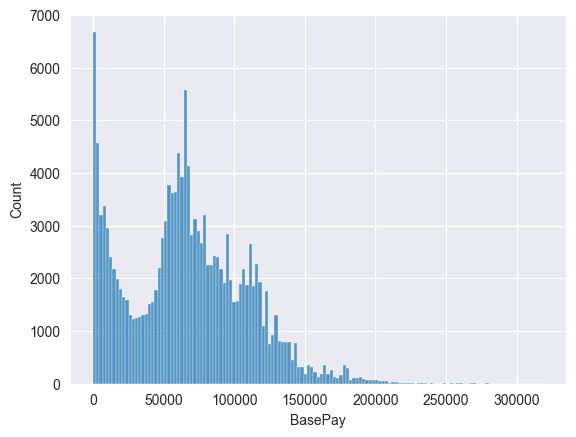

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data = df, x='BasePay')

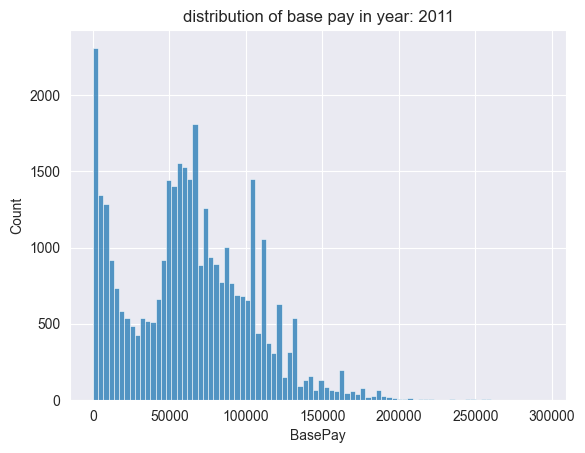

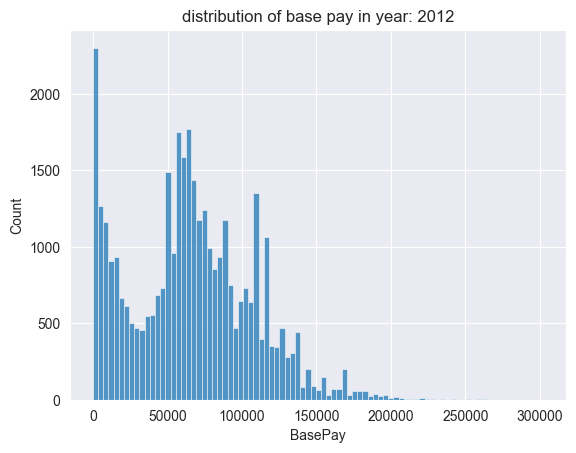

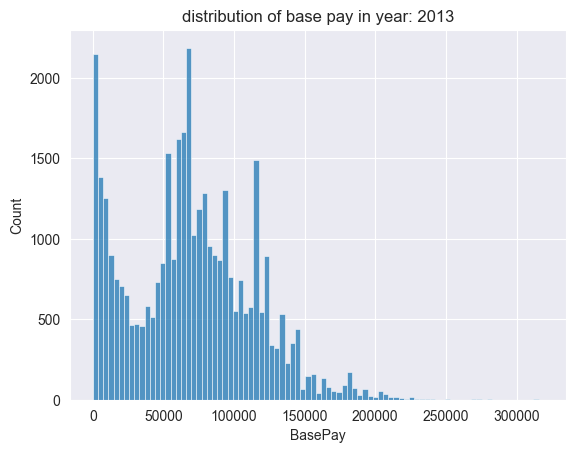

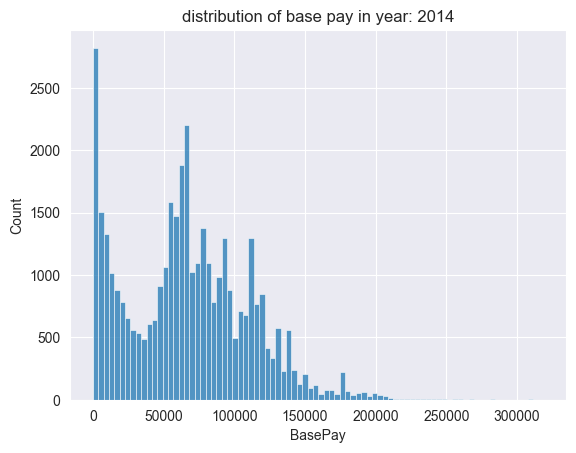

In [42]:
for i in df['Year'].unique():
    plt.figure()
    sns.histplot(df[df['Year'] == i], x='BasePay', )
    plt.title(f'distribution of base pay in year: {i}')
    plt.show()

<Axes: xlabel='BasePay'>

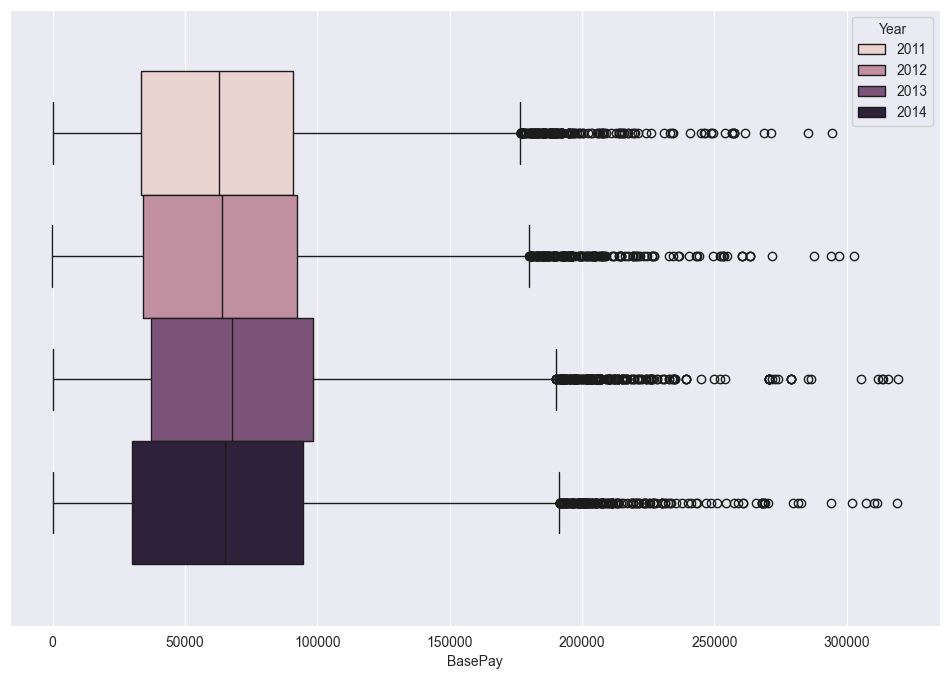

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,  x='BasePay', hue='Year')

### grouped analysis

In [63]:


trimmed_df = df[(df['TotalPay'] > df['TotalPay'].quantile(0.03)) & (df['TotalPay'] < df['TotalPay'].quantile(0.97))].copy()

trimmed_df['TotalPay'].describe()


count    139161.000000
mean      73269.311474
std       44235.551095
min        1516.340000
25%       41045.850000
50%       71644.710000
75%      103336.770000
max      180578.560000
Name: TotalPay, dtype: float64

In [68]:
trimmed_df.groupby('Year')['TotalPay'].mean()

Year
2011    71517.654351
2012    72882.856021
2013    75357.490547
2014    73314.385390
Name: TotalPay, dtype: float64

Id
656       San Francisco
657       San Francisco
658       San Francisco
659       San Francisco
660       San Francisco
              ...      
147571    San Francisco
147573    San Francisco
147574    San Francisco
147577    San Francisco
147578    San Francisco
Name: Agency, Length: 139161, dtype: object

209632.76

-66646.59999999999

### correlation analysis

In [45]:
df._get_numeric_data().corr()['TotalPay']

BasePay             0.954494
OvertimePay         0.504634
OtherPay            0.474024
Benefits            0.631193
TotalPay            1.000000
TotalPayBenefits    0.977153
Year                0.034733
Name: TotalPay, dtype: float64

the biggest factor on your salary is your base pay 

### analysis and insights

* there is a steady increase of average income over the years with a spike in 2013 this could be because the exceptional economical performance of the usa in 2013
as "The United States has seen most rapid deficit reduction since the demobilization from World War II" 
-- quoted from "https://obamawhitehouse.archives.gov/blog/2013/12/19/economy-2013"


* the salaries distribution is right skewed meaning people could be making a lot higher that what 50% of people make (median), this could mean that the 
experience and some types of jobs get you a way higher pay

# Good Luck!